<a href="https://colab.research.google.com/github/dawissem/fullpack-ia-module-1/blob/main/sentiument_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 474ms/step - accuracy: 0.6883 - loss: 0.5562 - val_accuracy: 0.8606 - val_loss: 0.3167
Epoch 2/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 70s 444ms/step - accuracy: 0.9058 - loss: 0.2500 - val_accuracy: 0.8344 - val_loss: 0.3607
Epoch 3/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 70s 446ms/step - accuracy: 0.9290 - loss: 0.1953 - val_accuracy: 0.8614 - val_loss: 0.3287
Epoch 4/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 87s 479ms/step - accuracy: 0.9517 - loss: 0.1401 - val_accuracy: 0.8664 - val_loss: 0.3764
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8584 - loss: 0.4047

🔹 Test Accuracy (LSTM): 0.8584


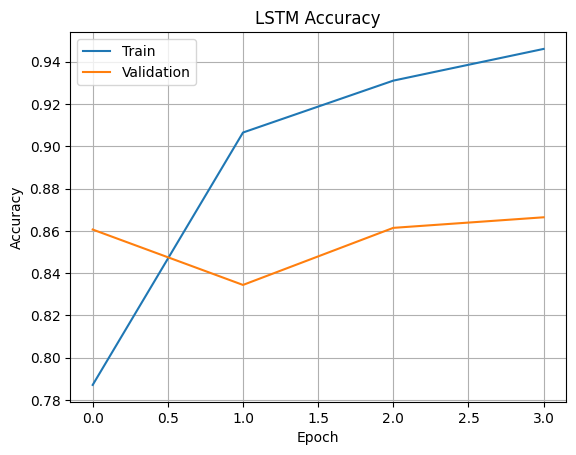

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
🔸 Test Accuracy (Naive Bayes BoW): 0.8370


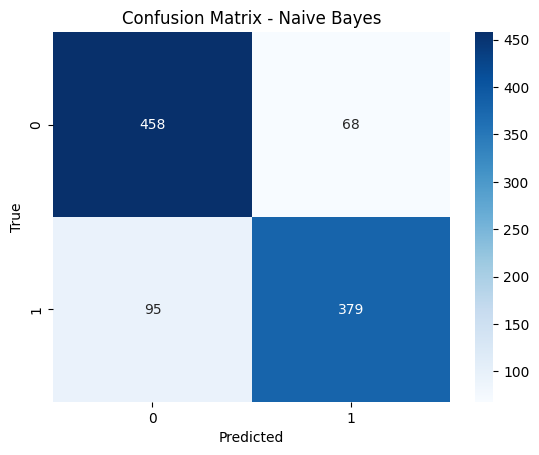

In [ ]:
# Analyse de sentiments avec LSTM sur IMDB Dataset (Google Colab-ready)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# 1. Chargement du dataset IMDB
vocab_size = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# 2. Padding
x_train_padded = pad_sequences(x_train, maxlen=maxlen)
x_test_padded = pad_sequences(x_test, maxlen=maxlen)

# 3. Modèle LSTM
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Entraînement
history = model.fit(x_train_padded, y_train, epochs=4, batch_size=128, validation_split=0.2)

# 5. Évaluation
loss, acc = model.evaluate(x_test_padded, y_test)
print(f'\n🔹 Test Accuracy (LSTM): {acc:.4f}')

# 6. Visualisation
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 7. Comparaison avec une baseline (Naive Bayes sur Bag-of-Words)
# On reconvertit les index en texte
word_index = imdb.get_word_index()
reverse_index = {v: k for k, v in word_index.items()}
decode_review = lambda review: ' '.join([reverse_index.get(i - 3, '?') for i in review])

train_text = [decode_review(review) for review in x_train[:2000]]
test_text = [decode_review(review) for review in x_test[:1000]]
train_labels = y_train[:2000]
test_labels = y_test[:1000]

vectorizer = CountVectorizer(max_features=10000)
X_train_bow = vectorizer.fit_transform(train_text)
X_test_bow = vectorizer.transform(test_text)

nb_model = MultinomialNB()
nb_model.fit(X_train_bow, train_labels)
nb_preds = nb_model.predict(X_test_bow)
nb_acc = accuracy_score(test_labels, nb_preds)
print(f"🔸 Test Accuracy (Naive Bayes BoW): {nb_acc:.4f}")

# 8. Matrice de confusion
conf = confusion_matrix(test_labels, nb_preds)
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


/tmp/ipython-input-2-3302710860.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Set2')


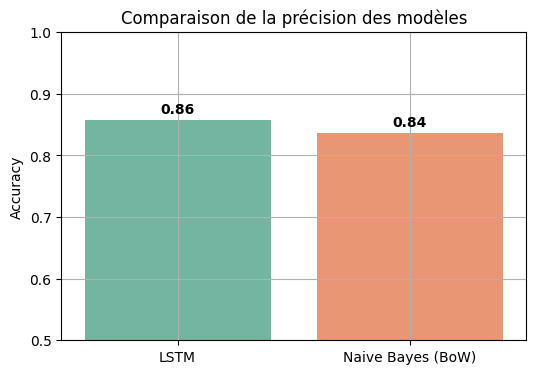

In [2]:
# 9. Visualisation comparative des performances

models = ['LSTM', 'Naive Bayes (BoW)']
accuracies = [acc, nb_acc]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.title("Comparaison de la précision des modèles")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(True)
plt.show()
